In [195]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np
import psycopg2
import sys

In [226]:
def downloadpage(url):
    re = requests.get(url)
    soup = BeautifulSoup(re.text,"html.parser")
    return soup

In [227]:
def since(daterange):
    daterange.lower()
    url = ''
    if daterange == "a":
        url = "https://github.com/trending?since=monthly"
    elif daterange == "b":
        url = "https://github.com/trending?since=weekly"
    else:
        url = "https://github.com/trending?since=daily"
    return url

In [228]:
userinput  = input("Choose (a) for Monthly -(b) for Weekly -(c) for Daily: ")
url  = since(userinput)

Choose (a) for Monthly -(b) for Weekly -(c) for Daily: b


In [229]:
page = downloadpage(url)

In [230]:
def user(box):
    h1 =box.find("h1",class_="h3 lh-condensed")
    a = h1.find('a',href=True)
    return a['href'][1:]

In [231]:
def technology(box):
    div = box.find("div",class_="f6 color-fg-muted mt-2")
    lang = div.find("span",itemprop = "programmingLanguage")
    if lang!=None:
            return lang.text
    else:
            return "None"

In [232]:
def starsnForks(box):
    a = box.find_all('a',class_="Link--muted d-inline-block mr-3")
    starnfork = [a[0].get_text().strip(),a[1].get_text().strip()]
    return starnfork

In [233]:
def builtBy(box):
    span = box.find('span',class_="d-inline-block mr-3")
    return [x.get('href')[1:] for x in span.find_all('a',class_="d-inline-block")]

In [234]:
def main(page):
    for box in page.find_all("article",class_='Box-row'):
        users = user(box)
        tech = technology(box)
        star = starsnForks(box)[0]
        fork = starsnForks(box)[1]
        contributers = builtBy(box)
        row = {"Repository":users,"Technology":tech,"Stars":star,"Forks":fork,"Built_by":contributers}
        table.loc[len(table)] = [users,tech,star,fork,contributers]

In [235]:
table=pd.DataFrame({"Repository":[],"Technology":[],"Stars":[],"Forks":[],"Built_by":[]})
main(page)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [236]:
table.head()

,Repository,Technology,Stars,Forks,Built_by
0,bregman-arie/devops-exercises,Python,"39,060","8,609","[surister, austinsonger, bregman-arie, knoxkno..."
1,TheAppleTucker/backend-GPT,JavaScript,"2,326",196,"[evanmays, TheAppleTucker, davidyue1]"
2,apitable/apitable,TypeScript,"5,096",288,"[mr-kelly, wangkailang, JaneSu, SHEEHAN0802, C..."
3,shadcn/ui,TypeScript,"7,210",233,"[shadcn, Andersgee, dgknca, elliot, lucaspessi..."
4,karpathy/nn-zero-to-hero,Jupyter Notebook,"6,017",500,"[karpathy, edvenson]"


In [237]:
userrepo = table["Repository"].str.split("/",n=1,expand =True)

In [238]:
table["User"] = userrepo[0]

In [239]:
table.drop(columns=["Repository"],inplace=True)

In [240]:
table["Repository"] = userrepo[1]

In [241]:
column = table.pop("User")
table.insert(0,'User',column)

In [242]:
column = table.pop("Repository")
table.insert(1,'Repository',column)

In [243]:
table["Contributions"] = table["Built_by"].apply(lambda row: len(row))

In [244]:
table.head()

,User,Repository,Technology,Stars,Forks,Built_by,Contributions
0,bregman-arie,devops-exercises,Python,"39,060","8,609","[surister, austinsonger, bregman-arie, knoxkno...",5
1,TheAppleTucker,backend-GPT,JavaScript,"2,326",196,"[evanmays, TheAppleTucker, davidyue1]",3
2,apitable,apitable,TypeScript,"5,096",288,"[mr-kelly, wangkailang, JaneSu, SHEEHAN0802, C...",5
3,shadcn,ui,TypeScript,"7,210",233,"[shadcn, Andersgee, dgknca, elliot, lucaspessi...",5
4,karpathy,nn-zero-to-hero,Jupyter Notebook,"6,017",500,"[karpathy, edvenson]",2


<BarContainer object of 5 artists>

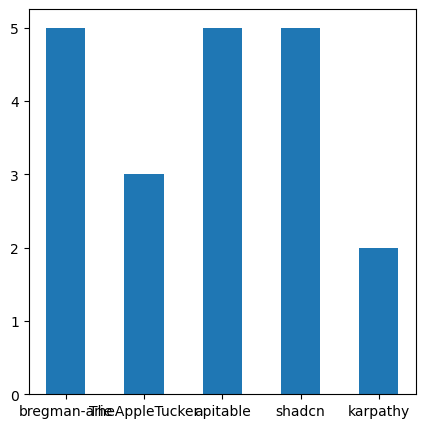

In [245]:
plt.figure(figsize=(5,5))
plt.bar(table["User"][:5],table['Contributions'][:5],width=0.5)

In [246]:
data = dict(table['Technology'].value_counts())

In [247]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

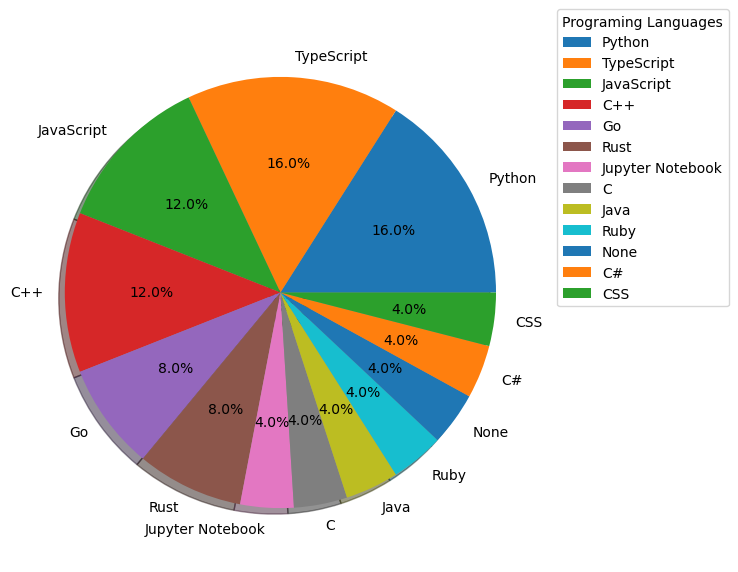

In [248]:
fig, ax = plt.subplots(figsize =(7, 7))
ax.pie(list(data.values()),autopct = lambda pct: func(pct, list(data.values())),labels=list(data.keys()),shadow=True)
ax.legend(title ="Programing Languages",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1.5))
plt.show()

In [249]:
table.head()

,User,Repository,Technology,Stars,Forks,Built_by,Contributions
0,bregman-arie,devops-exercises,Python,"39,060","8,609","[surister, austinsonger, bregman-arie, knoxkno...",5
1,TheAppleTucker,backend-GPT,JavaScript,"2,326",196,"[evanmays, TheAppleTucker, davidyue1]",3
2,apitable,apitable,TypeScript,"5,096",288,"[mr-kelly, wangkailang, JaneSu, SHEEHAN0802, C...",5
3,shadcn,ui,TypeScript,"7,210",233,"[shadcn, Andersgee, dgknca, elliot, lucaspessi...",5
4,karpathy,nn-zero-to-hero,Jupyter Notebook,"6,017",500,"[karpathy, edvenson]",2


In [250]:
table['Stars'] = table['Stars'].apply(lambda x:int(x.replace(",","")))
table['Forks'] = table['Forks'].apply(lambda y:int(y.replace(",","")))
table['Contributions'] = table['Contributions'].apply(lambda y:int(y))

In [251]:
table.drop('Built_by',inplace=True,axis=1)

In [252]:
table.head()

,User,Repository,Technology,Stars,Forks,Contributions
0,bregman-arie,devops-exercises,Python,39060,8609,5
1,TheAppleTucker,backend-GPT,JavaScript,2326,196,3
2,apitable,apitable,TypeScript,5096,288,5
3,shadcn,ui,TypeScript,7210,233,5
4,karpathy,nn-zero-to-hero,Jupyter Notebook,6017,500,2


In [253]:
fname = datetime.datetime.now().strftime("%b_%d_%H_%M")

In [254]:
table.to_csv(f"E:\postgres_proj\ {fname}_{url.split('=')[1]}.csv",index=False)

In [255]:
#using with statement it automatically colses the connection
connection = psycopg2.connect(dbname="trending_repos", user="username",password="password",host="127.0.0.1",port="5432")
try:
    cursor = connection.cursor()
    sql = f"""COPY tren_repo.{url.split('=')[1]}("User","Repository","Technology","Stars","Forks","Contributions")
            From 'E:\postgres_proj\ {fname}_{url.split('=')[1]}.csv'
            DELIMITER ','
            CSV HEADER;"""
    cursor.execute(sql)
except psycopg2.DatabaseError as e:
    print(f'Error {e}')
    sys.exit(1)
finally:
    if connection:
        connection.commit()
        connection.close()